## Calcular el Factorial de un número

Crear una función en R que calcule el factorial de un número. Se puede hacer recursivo o iterativo.

In [9]:
# Solución recursiva
factorial<-function(x){
    if (x > 0){
        return(x*factorial(x-1))
    } else {
        return(1)
    }
}

# Solución iterativa
factorial2<-function(x){
    m = 1
    while (x > 0){
        m<-m*x
        x<-x-1
    }
    return(m)
}

miFactorial<-function(X){
    f<-c(1:X)
    factorial<-prod(f)
    factorial
}
miFactorial<-function(X){
    prod(1:X)
}

In [4]:
factorial(3)
factorial2(3)

[1] 6

[1] 6

In [10]:
miFactorial(6)

[1] 720

## Percentiles

Hacer una función que calcule el percentil de un vector. Recibirá dos parámetros, el vector y el percentil que queremos ver, sino se indica el percentil se supondrá que es el 50%.

In [42]:
percentil1<-function(v,p=50){
    return(sort(v)[length(v)*p/100+1])
}
percentil2 = function(x, per=50){
    x = sort(x)
    pXX = round((per/100) * length(x))+1
    return(x[pXX])
}

calcPercentile<-function(x,p=50){
    p<-p/100
    x<-sort(na.omit(x))
    idx<- 1+(length(x)-1)*p 
    
    err<-ceiling(idx)-idx
    
    xl <- x[floor(idx)]
    xh <- x[ceiling(idx)]
    
    xl*err+xh*(1-err)    
}

In [36]:
v<-c(5, 10, 6, 1, 9,3 , 20, 35, 2,7)

In [41]:
idx<-5.2
ceiling(idx)-idx
floor(idx)
ceiling(idx)

[1] 0.8

[1] 5

[1] 6

In [48]:
sort(v)

[1]  1  2  3  5  6  7  9 10 20 35

In [38]:
percentil1(v,p=50)
percentil2(v,per=50)

[1] 7

[1] 7

In [49]:
calcPercentile(v,p=85)
quantile(v,0.85)

[1] 16.5

85% 
16.5

In [50]:
x<-runif(100,min=0,max=10)
calcPercentile(x,p=70)
quantile(x,0.7)

[1] 7.43821

70% 
7.43821

In [51]:
quantile

function (x, ...) 
UseMethod("quantile")
<bytecode: 0x55a846bb1f78>
<environment: namespace:stats>

 ## CSV edad española
 
 Usando el CSV del INE.¿Cual es la media de edad de la población española? ¿y la mediana? ¿la moda?

\\[ 
    \bar{x} =  \frac{1}{\text{poblaciónTotal}} \sum _{i=1}^N edad_i · poblaciónConEdad_i 
\\]

In [53]:
poblacion<-read.csv("data/9663c.csv",skip=6,
                    fileEncoding="ISO-8859-1",header=F)
poblacion$V5<-NULL
colnames(poblacion)<-c("edadTxt","Total","Hombres","Mujeres")
poblacion<-poblacion[1:105,]
poblacion$edad<-0:104
head(poblacion)

,edadTxt,Total,Hombres,Mujeres,edad
,<fct>,<dbl>,<dbl>,<dbl>,<int>
1,0 años,393112,202106,191005,0
2,1 año,419307,215644,203663,1
3,2 años,430003,221650,208352,2
4,3 años,432554,222917,209637,3
5,4 años,443764,228592,215172,4
6,5 años,465525,240006,225518,5


In [55]:
as.integer(head(sub("año(|s)","",poblacion$edadTxt)))

[1] 0 1 2 3 4 5

In [57]:
poblacion <- poblacion[1:105,]
#poblacion$edad <- 0:104
poblacion$edad <- as.integer(sub("año(|s)","",poblacion$edadTxt))
poblacion$edad <- as.integer(sub("año(s*)","",poblacion$edadTxt))
tail(poblacion)

,edadTxt,Total,Hombres,Mujeres,edad
,<fct>,<dbl>,<dbl>,<dbl>,<int>
100,99 años,7894,1773,6121,99
101,100 años,5381,1204,4177,100
102,101 años,3266,675,2591,101
103,102 años,1762,285,1477,102
104,103 años,1103,169,935,103
105,104 años,638,97,542,104


In [62]:
paste("La moda es:",poblacion$edad[which.max(poblacion$Total)],'años')
poblacion$edad[poblacion$Total == max(poblacion$Total)]

[1] "La moda es: 41 años"

[1] 41

In [64]:
paste("La edad media es:",round(sum(poblacion$Total*poblacion$edad)/sum(poblacion$Total),2),"años")

[1] "La edad media es: 42.59 años"

In [66]:
rep(c(1,2,3,4),c(1,1,2,2))

[1] 1 2 3 3 4 4

In [67]:
mean(rep(poblacion$edad,poblacion$Total))

[1] 42.58639

In [70]:
indice<-sum(poblacion$Total)/2
acumulado<-0
i<-1
while (acumulado<indice){
    acumulado<-acumulado+poblacion$Total[i]
    i<-i+1
}
medianaPoblacionEspañola<-poblacion$edad[i-1]
medianaPoblacionEspañola

[1] 43

In [69]:
paste0("Mediana: ",median(rep(poblacion$edad,poblacion$Total)))

[1] "Mediana: 43"

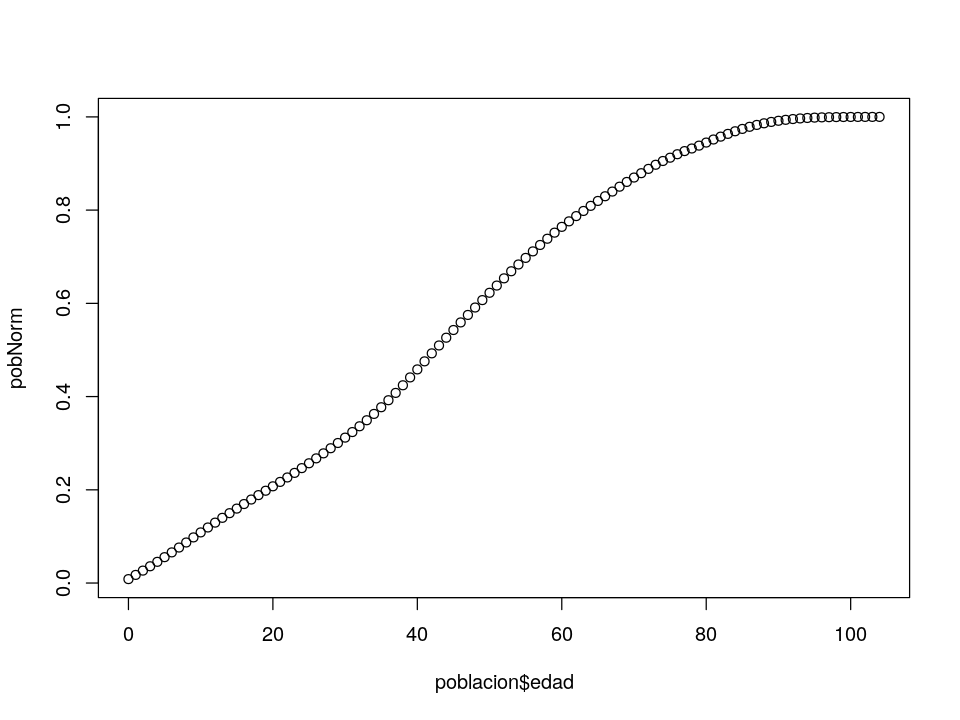

In [73]:
options(repr.plot.height=6,repr.plot.width=8)
pobNorm<-cumsum(poblacion$Total)/sum(poblacion$Total)
plot(poblacion$edad,pobNorm)

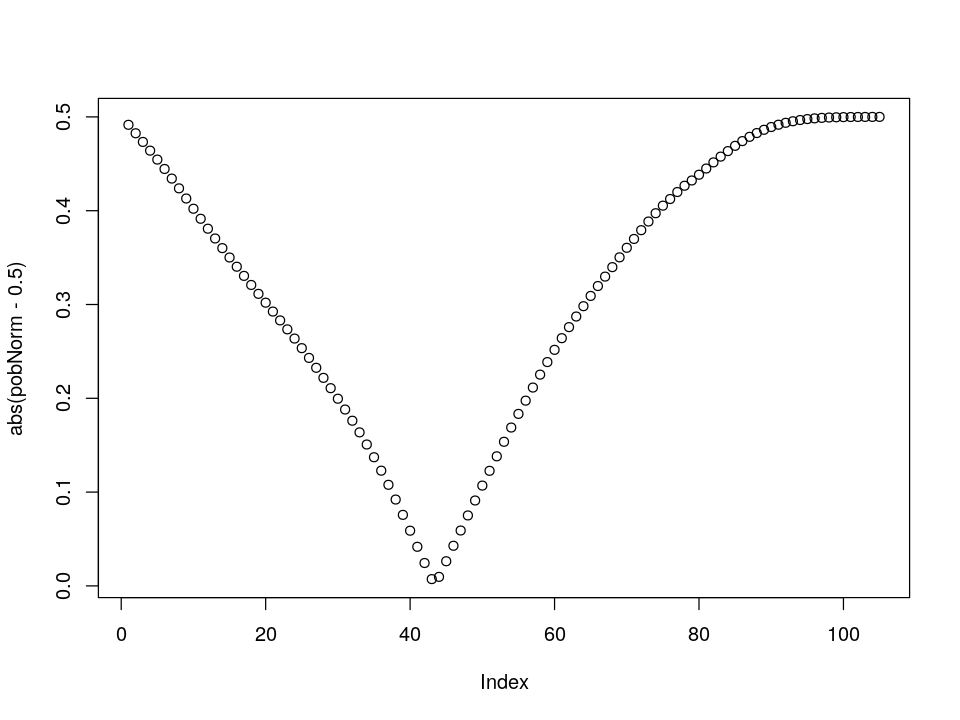

In [76]:
plot(abs(pobNorm-0.5))

In [78]:
which.min(abs(pobNorm-0.5))

[1] 43

In [80]:
abs(pobNorm-0.5)[c(41,42,43,44)]

[1] 0.041702540 0.024425373 0.007260435 0.009642755

In [81]:
pobNorm[c(41,42,43,44)]

[1] 0.4582975 0.4755746 0.4927396 0.5096428

In [83]:
poblacion$edad[which.min(abs(pobNorm-0.5))+1]

[1] 43

## Peso al nacer

Leer el dataset que se encuentra en tests/birthweight_reduced.csv. 
Quedarse con la columna Birthweight.
Calcular cuantiles, media, desigualdad Chebyshev para k=2, y compararla con los cuartiles. Boxplot.
Pinta su histograma y función de densidad.

In [86]:
bwt<-read.csv("data/birthweight_reduced.csv")
weight<-bwt$Birthweight*0.453592

In [90]:
k<-sqrt(2)

lim_inf<-mean(weight)-k*sd(weight)
lim_sup<-mean(weight)+k*sd(weight)
paste("Como máximo el",1/k^2,"de las muestras estaran fuera del intervalo [",lim_inf,",",lim_sup,"]")

[1] "Como máxmo el 0.5 de las muestras estaran fuera del intervalo [ 2.4420263428054 , 4.14801742862317 ]"

In [91]:
quantile(weight,c(0.25,0.75))

25%      75% 
2.925668 3.628736

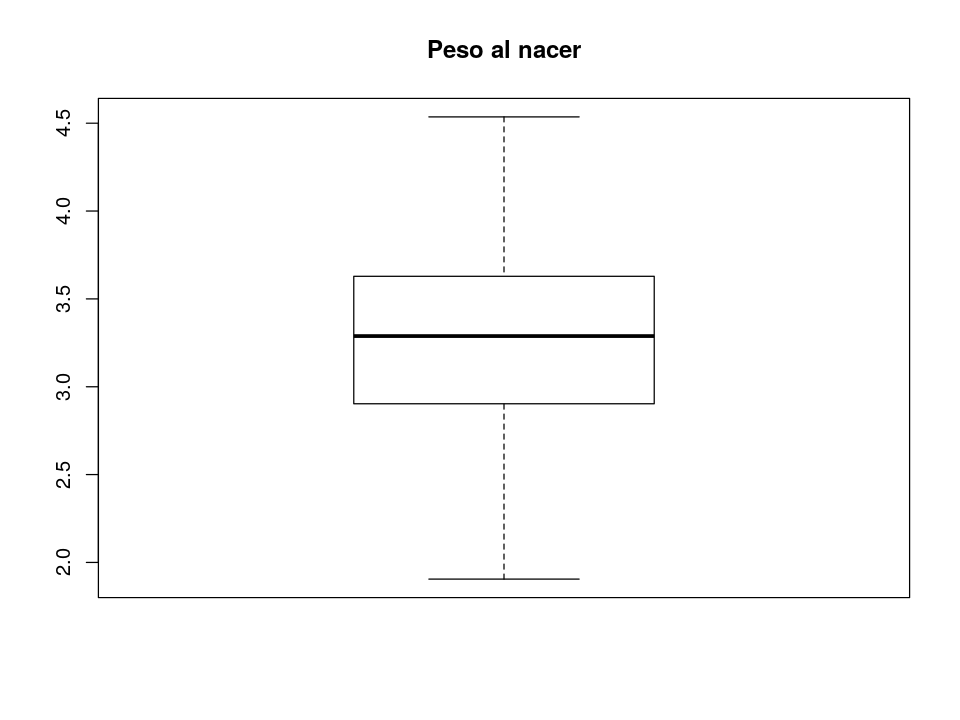

In [93]:
boxplot(weight,main="Peso al nacer")

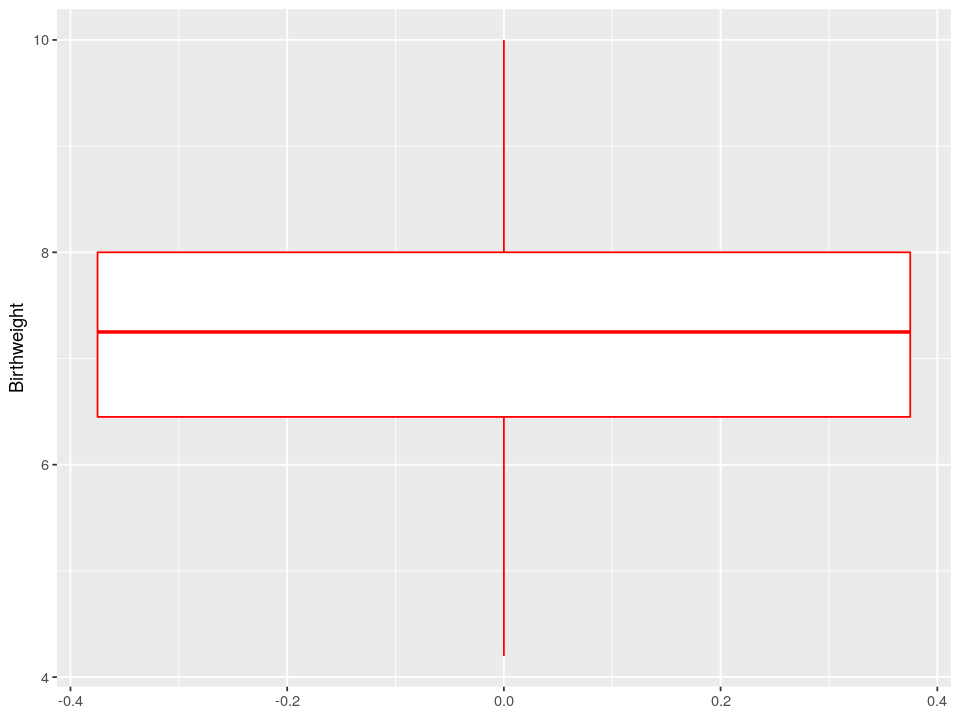

In [94]:
library(ggplot2)
ggplot(bwt,aes(y=Birthweight))+geom_boxplot(color="red")

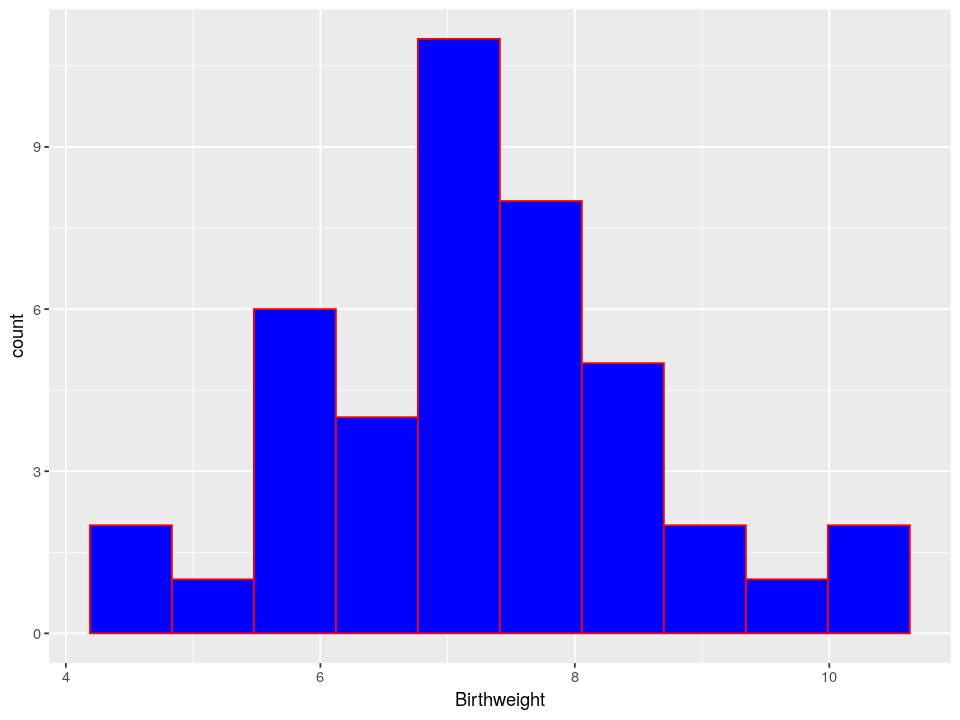

In [95]:
ggplot(bwt,aes(x=Birthweight))+geom_histogram(bins=10,color="red",fill="blue")

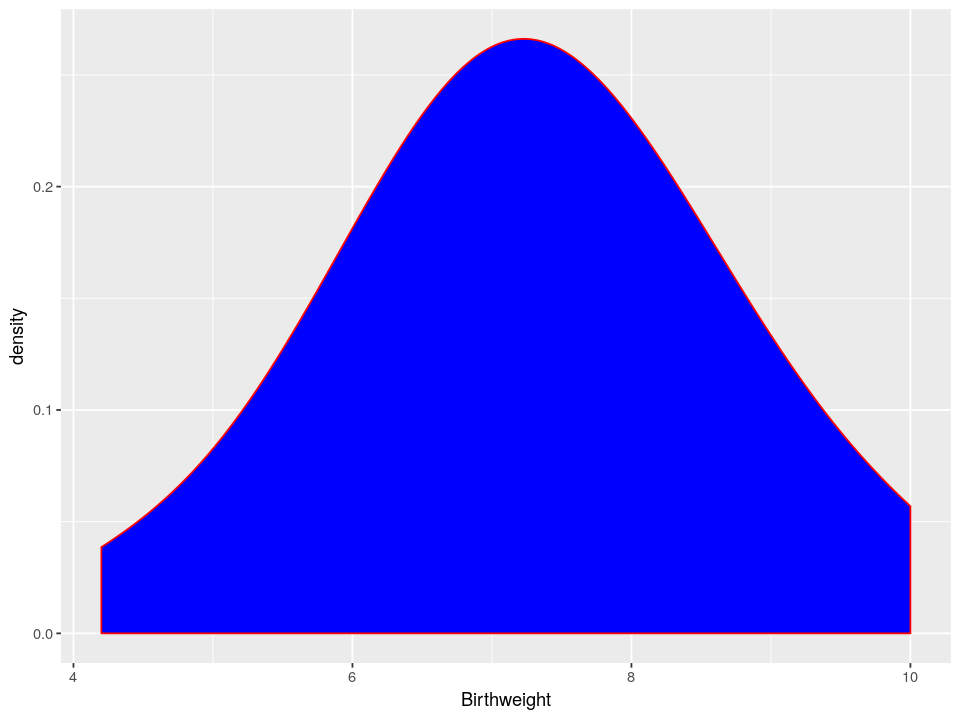

In [102]:
ggplot(bwt,aes(x=Birthweight))+geom_density(color="red",fill="blue",bw=0.8)